In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
 
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
img = image.load_img("basedata\\training\\Productive\\Screenshot (16).png")

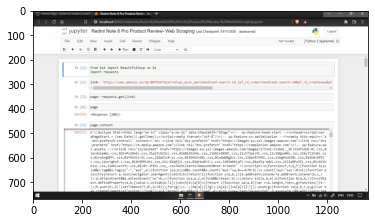

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("basedata\\training\\Productive\\Screenshot (16).png").shape

(768, 1366, 3)

In [5]:
#Rescaling Images 
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
#Training Dataset
train_dataset = train.flow_from_directory("basedata\\training", 
                                          target_size = (300,500), 
                                          batch_size = 5, 
                                          class_mode = 'binary')

#Validation Dataset
validation_dataset = train.flow_from_directory("basedata\\validation", 
                                          target_size = (300,500), 
                                          batch_size = 5, 
                                          class_mode = 'binary')

Found 120 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'Non-Productive': 0, 'Productive': 1}

In [8]:
#Defining The Model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape=(300,500,3)),
                                    tf.keras.layers.MaxPool2D(2,2),  #it is used to reduce the dims of the feature map 
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),   #relu helps with making the model non-linear
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

In [9]:
#Compiling The model
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [10]:
#Fitting The model
model_fit = model.fit(train_dataset,                          
                     steps_per_epoch = 3,              
                     epochs = 10,                      #Epochs are iteration that we are providing to the model
                     validation_data = validation_dataset)                    

Epoch 1/10
3/3 [==============================] - 14s 3s/step - loss: 59.5283 - accuracy: 0.5333 - val_loss: 0.5193 - val_accuracy: 0.7544
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 18.4411 - accuracy: 0.4000 - val_loss: 7.2453 - val_accuracy: 0.6491
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 1.5238 - accuracy: 0.8000 - val_loss: 0.1234 - val_accuracy: 0.9649
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.2041 - accuracy: 0.8667 - val_loss: 7.7262 - val_accuracy: 0.6491
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 1.0021 - accuracy: 0.8000 - val_loss: 0.3072 - val_accuracy: 0.8421
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.3514 - accuracy: 0.8667 - val_loss: 0.0579 - val_accuracy: 0.9825
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9825
Epoch 8/10
3/3 [======================

In [ ]:
#Testing our model

up_image = "basedata\\testing\\Screenshot 2022-04-01 220545.png"
pre_image = image.load_img(up_image, target_size=(300,500))
plt.imshow(pre_image)
plt.show()

X = image.img_to_array(pre_image)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
    
val = model.predict(images)
if val == 0:
    print("You are Non-Productive")
else:
    print("You are Productive")

In [11]:
# model.save('productivity_classifier.h5')   // didn't uplaode the saved model file as it was too large and i was not able
#                                                 to upload it on the git

In [ ]:
#using our saved model 

from tensorflow.keras.models import load_model

model_file = "productivity_classifier_1.h5"
loaded_model = load_model(model_file)
up_image ="basedata\\Unknown data\\Screenshot 2022-04-04 131639.jpg"
pre_image = image.load_img(up_image, target_size=(300,500))
plt.imshow(pre_image)
plt.show()

X = image.img_to_array(pre_image)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
pred = loaded_model.predict(images)
print(pred)
if pred == 0:
    print("you are not productive")
else:
    print("You are productive")

In [ ]:
#loading our model

# from tensorflow.keras.models import load_model

# model_file = "productivity_classifier.h5"
# loaded_model = load_model(model_file)
# pred = loaded_model.predict(images)
# pred

    

In [ ]:
# #Saving the model

# model.save('productivity_classifier.h5')